In [3]:
!pip install kaggle


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azamaliafzal","key":"1d6bf009b8943fb315bda09d9f72f210"}'}

In [13]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [14]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!unzip house-prices-advanced-regression-techniques.zip


Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())
print(test.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [17]:
data= pd.read_csv('train.csv')
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# prompt: i want to drop every column which is not int or float

# Select numerical columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

# Drop non-numerical columns
data_numerical = data[numerical_cols]

print(data_numerical.head())
data_numerical.info()
dataf= data_numerical


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

In [21]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [22]:
# prompt: i want to fill nan values with 0

dataf.fillna(0, inplace=True)
print(dataf.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

<ipython-input-22-d111d9257ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.fillna(0, inplace=True)


In [23]:
dataf.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

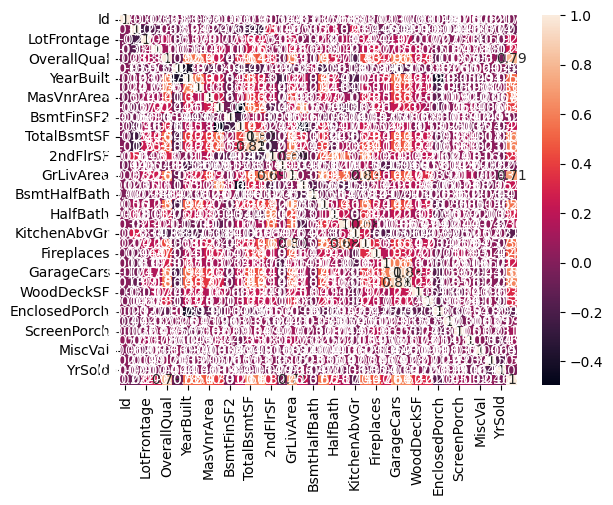

In [24]:

# Calculate correlation matrix after converting
sns.heatmap(dataf.corr(), annot=True)

In [25]:
sns.pairplot(dataf)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b8d083613f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b8d08360670> (for post_execute):


KeyboardInterrupt: 

In [27]:
dataf.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:


X= dataf[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]

In [29]:
y= train[['SalePrice']]
print(y.head())

   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


In [30]:
print(X.head())

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0         706           0  ...         548   
1          1976         0.0         978           0  ...         460   
2          2002       162.0         486           0  ...         608   
3          1970         0.0         216           0  ...         642   
4          2000       350.0         655           0  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61     

In [32]:
print(X.isna())

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          False        False    False        False        False      False   
1          False        False    False        False        False      False   
2          False        False    False        False        False      False   
3          False        False    False        False        False      False   
4          False        False    False        False        False      False   
...          ...          ...      ...          ...          ...        ...   
1455       False        False    False        False        False      False   
1456       False        False    False        False        False      False   
1457       False        False    False        False        False      False   
1458       False        False    False        False        False      False   
1459       False        False    False        False        False      False   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [33]:
print (X.shape)
print (y.shape)

(1460, 36)
(1460, 1)


In [37]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        X = np.hstack((np.ones((n_samples, 1)), X))


        self.weights = np.zeros(n_features + 1)

        for i in range(self.n_iterations):

            y_pred = np.dot(X, self.weights)


            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))


            self.weights -= self.learning_rate * dw


            if i % 100 == 0:
                cost = self.compute_cost(y_pred, y, n_samples)
                print(f"Iteration {i}: Cost {cost}")

    def compute_cost(self, y_pred, y, n_samples):
        return (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)

    def predict(self, X):
        n_samples = X.shape[0]
        X = np.hstack((np.ones((n_samples, 1)), X))
        return np.dot(X, self.weights)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
print(x_train_scaled)

[[-0.8667643   0.35953495 -0.21289571 ... -0.09274033 -0.13341669
   1.65006527]
 [ 0.07410996  0.04874271 -0.26524463 ... -0.09274033 -0.5080097
   0.89367742]
 [-0.63154574  0.27477343 -0.17784146 ... -0.09274033 -0.5080097
   0.13728958]
 ...
 [-0.8667643   0.07699655 -0.23409563 ... -0.09274033 -0.88260272
  -1.37548612]
 [-0.16110861 -0.06427265 -0.28337613 ... -0.09274033 -0.13341669
  -0.61909827]
 [ 1.48542135 -0.12078033 -0.65139925 ... -0.09274033 -0.13341669
   0.89367742]]


In [44]:
y_train = y_train.values.flatten()


In [45]:
print(y_train)

[145000 178000  85000 ... 115000 189950 174000]


In [47]:
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(x_train_scaled, y_train)


Iteration 0: Cost 19442791762.854877
Iteration 100: Cost 2836216659.0148497
Iteration 200: Cost 893123466.195446
Iteration 300: Cost 624434616.9668261
Iteration 400: Cost 583774730.5017991
Iteration 500: Cost 575650845.2017813
Iteration 600: Cost 572964971.9965549
Iteration 700: Cost 571615001.430973
Iteration 800: Cost 570797284.8370007
Iteration 900: Cost 570262977.4157971


In [48]:
y_pred = model.predict(x_test_scaled)


In [49]:
print(y_pred)

[149770.01362209 311458.58914294 113428.14058279 179248.82693593
 301704.38523926  66386.36645042 232768.18435169 149402.39980404
  64140.02628242 146406.20189067 149564.91286572 109520.62752675
  94249.46664911 208569.7590503  188933.66786262 137971.37432515
 208634.76218188 133350.3760523  116019.52433093 230547.15816572
 185348.15759983 212289.32615042 189252.35787709 129225.83965136
 209714.93530915 150715.69124407 192998.83632974  85498.96265872
 181399.65355937 180246.5348797  117485.24751055 277892.49991714
 244691.30167546  85139.80212593 274037.8517004  158264.6001003
 144028.13313857 213145.73472272 307590.24214559  82596.13580878
 131806.18699921 245685.17131468  99199.06502955 290678.90915646
 131051.59885371 123968.92521458 101101.58966747 126095.66254433
 363317.51492398 126703.21790935 103260.35788769 220450.49061472
  90514.89627052 323242.93209825 162974.54698279 245596.70967181
 226090.08676367 151737.28837327 158182.48316394 108523.07587883
  56368.39864238 139507.30

In [50]:
# prompt: check accuracy score

from sklearn.metrics import r2_score
print("Accuracy Score:", r2_score(y_test, y_pred))


Accuracy Score: 0.830313640370478


In [51]:
# prompt: check  rsm

from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are already defined as in the preceding code

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 36076.99725959053


In [52]:
test_data= pd.read_csv('test.csv')
print(test_data.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [53]:



X_test= test_data[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]



In [54]:
y_pred_test = model.predict(X_test)

In [55]:
print (y_pred_test)

[8.51276046e+07 1.03587664e+08 1.09330560e+08 ... 1.30569110e+08
            nan 9.99483307e+07]


Reinitialized existing Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@6b720e6a9dfc.(none)')
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git remote add origin <your_git_repo_url>'
error: src refspec master does not match any
error: failed to push some refs to 'origin'
